In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(context='notebook', style='ticks', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

In [2]:
df = pd.read_csv('G:\M.Sc\Python\LinearRegression\\advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


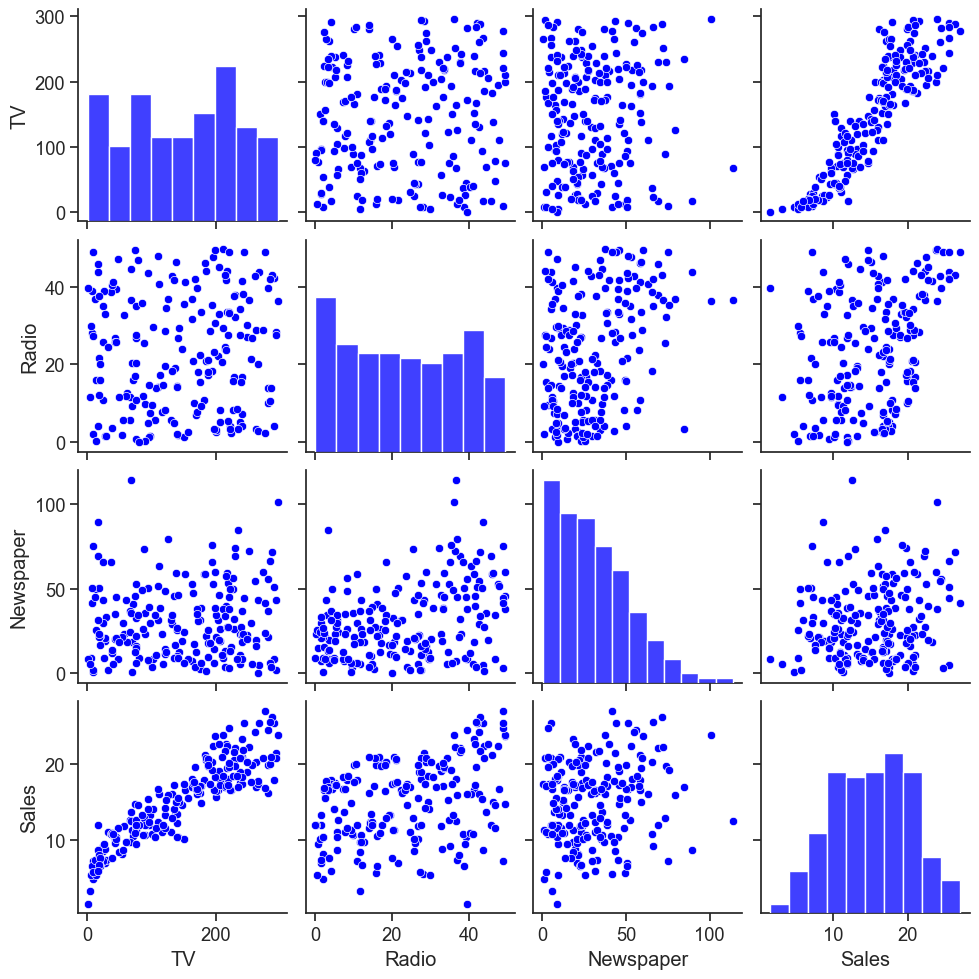

In [5]:
sns.pairplot(df, plot_kws={'color':'blue'}, diag_kws={'color': 'blue'})

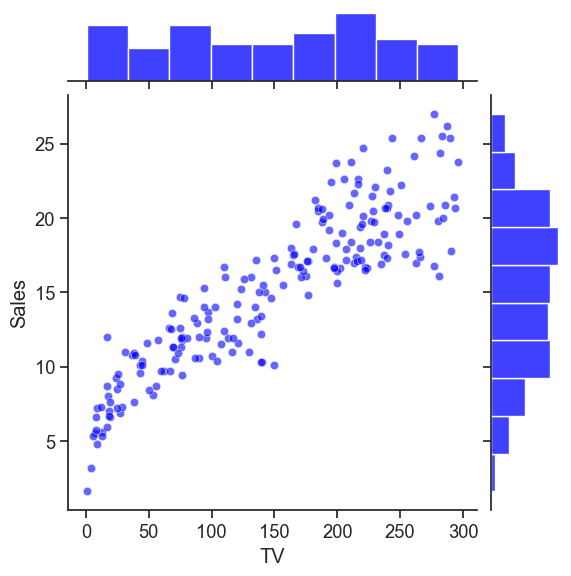

In [6]:
sns.jointplot(x='TV', y='Sales', data=df, color='blue', alpha=0.6)

<Axes: xlabel='TV', ylabel='Sales'>

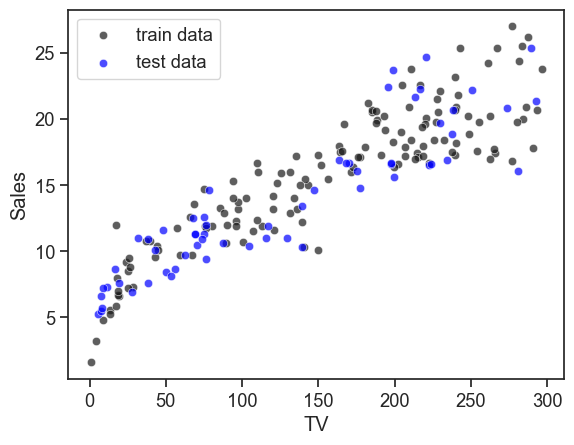

In [7]:
from sklearn.model_selection import train_test_split

X = df[['TV']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sns.scatterplot(x=X_train['TV'], y=y_train, label='train data', alpha=0.7, color='k')
sns.scatterplot(x=X_test['TV'], y=y_test, label='test data', alpha=0.7, color='blue')

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)
print(f'Coefficient: {reg.coef_[0]: .4f} Intercept: {reg.intercept_: .4f}')
print(f'Sales = {reg.coef_[0]: .4f} * TV + {reg.intercept_: .4f}')

Coefficient:  0.0548 Intercept:  7.2066
Sales =  0.0548 * TV +  7.2066


<Axes: xlabel='TV', ylabel='Sales'>

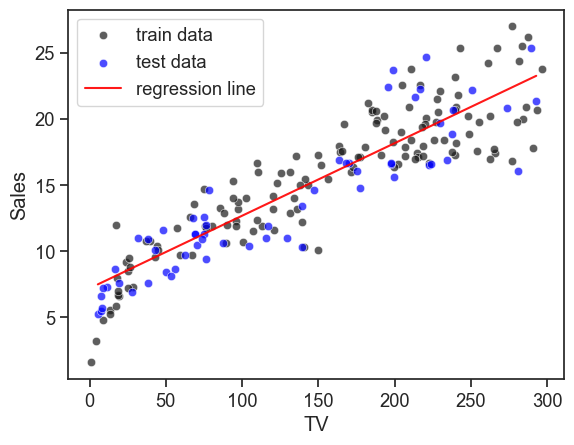

In [9]:
sns.scatterplot(x=X_train['TV'], y=y_train, label='train data', alpha=0.7, color='k')
sns.scatterplot(x=X_test['TV'], y=y_test, label='test data', alpha=0.7, color='blue')
sns.lineplot(x=X_test['TV'], y=y_predict, label='regression line', alpha=0.9, color='red')

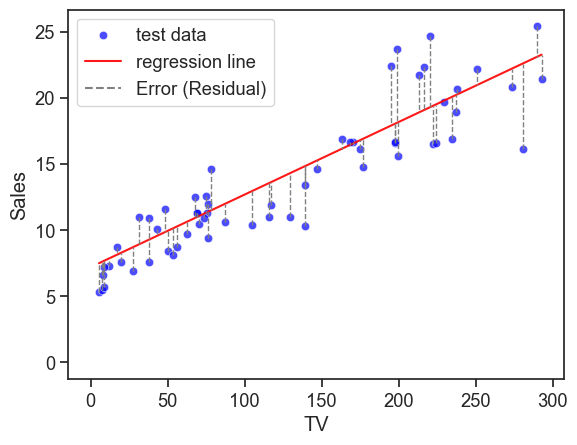

In [10]:
import matplotlib.pyplot as plt

sns.scatterplot(x=X_test['TV'], y=y_test, label='test data', alpha=0.7, color='blue')
sns.lineplot(x=X_test['TV'], y=y_predict, label='regression line', alpha=0.9, color='red')

for i in range(len(X_test)):
    plt.plot(
        [X_test['TV'].values[i], X_test['TV'].values[i]],
        [y_test.values[i], y_predict[i]],
        linestyle='--',
        color='gray',
        linewidth=1
    )
plt.plot(
    [0], [0],
    linestyle='--',
    color='gray',
    label='Error (Residual)'
)
plt.legend()

Text(0.5, 16.044444444444423, 'Residual Error')

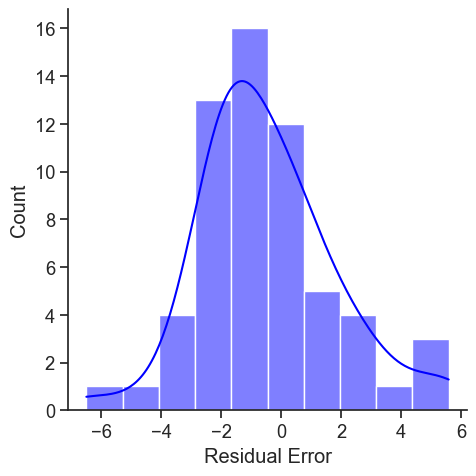

In [11]:
residuals = y_test-y_predict
sns.displot(residuals, bins=10, kde=True, color='blue')
plt.xlabel("Residual Error")

In [12]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
import math
import numpy as np

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = math.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)
mape = np.mean(np.abs((y_test - y_predict) / y_test)) * 100

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)
print("MAPE:", mape, "%")

MSE : 5.179525402166653
RMSE: 2.2758570698017597
MAE : 1.8069123776641516
R²  : 0.814855389208679
MAPE: 14.476895433865355 %
